In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv("parkinsons disease.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'parkinsons disease.csv'

In [ ]:
df.columns

Index(['PATNO', 'Cohort', 'Subgroup', 'ENRLPD', 'ENRLPROD', 'ENRLLRRK2',
       'ENRLGBA', 'ENRLSNCA', 'ENRLPRKN', 'ENRLPINK1', 'Unnamed: 10', 'CONPD',
       'CONPROD', 'CONLRRK2', 'CONGBA', 'CONSNCA', 'CONPRKN', 'CONPINK1',
       'Comments', 'CONDATE'],
      dtype='object')

In [ ]:
df.shape

(938, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PATNO        938 non-null    int64  
 1   Cohort       938 non-null    object 
 2   Subgroup     938 non-null    object 
 3   ENRLPD       938 non-null    int64  
 4   ENRLPROD     938 non-null    int64  
 5   ENRLLRRK2    938 non-null    int64  
 6   ENRLGBA      938 non-null    int64  
 7   ENRLSNCA     938 non-null    int64  
 8   ENRLPRKN     938 non-null    object 
 9   ENRLPINK1    938 non-null    object 
 10  Unnamed: 10  0 non-null      float64
 11  CONPD        938 non-null    int64  
 12  CONPROD      938 non-null    int64  
 13  CONLRRK2     938 non-null    object 
 14  CONGBA       938 non-null    object 
 15  CONSNCA      938 non-null    int64  
 16  CONPRKN      938 non-null    object 
 17  CONPINK1     938 non-null    object 
 18  Comments     11 non-null     object 
 19  CONDATE 

In [ ]:
df.dtypes

PATNO            int64
Cohort          object
Subgroup        object
ENRLPD           int64
ENRLPROD         int64
ENRLLRRK2        int64
ENRLGBA          int64
ENRLSNCA         int64
ENRLPRKN        object
ENRLPINK1       object
Unnamed: 10    float64
CONPD            int64
CONPROD          int64
CONLRRK2        object
CONGBA          object
CONSNCA          int64
CONPRKN         object
CONPINK1        object
Comments        object
CONDATE         object
dtype: object

In [ ]:
df.head()

,PATNO,Cohort,Subgroup,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,ENRLPRKN,ENRLPINK1,Unnamed: 10,CONPD,CONPROD,CONLRRK2,CONGBA,CONSNCA,CONPRKN,CONPINK1,Comments,CONDATE
0,100001,Parkinson's Disease,Sporadic,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,NaN,09/23/2022
1,100002,Parkinson's Disease,Sporadic,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,NaN,09/23/2022
2,100005,Parkinson's Disease,Sporadic,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,NaN,09/23/2022
3,100006,Parkinson's Disease,Sporadic,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,NaN,09/23/2022
4,100007,Parkinson's Disease,Sporadic,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,NaN,09/23/2022


In [ ]:
# Drop columns with all NaN values
data = df.dropna(axis=1)

In [ ]:
data.isnull().sum()

PATNO        0
Cohort       0
Subgroup     0
ENRLPD       0
ENRLPROD     0
ENRLLRRK2    0
ENRLGBA      0
ENRLSNCA     0
ENRLPRKN     0
ENRLPINK1    0
CONPD        0
CONPROD      0
CONLRRK2     0
CONGBA       0
CONSNCA      0
CONPRKN      0
CONPINK1     0
CONDATE      0
dtype: int64

In [ ]:
data.drop(['CONDATE',"PATNO"], axis=1,inplace=True)

C:\Users\MEGHANA\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data.drop(['Cohort'], axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Subgroup     0
ENRLPD       0
ENRLPROD     0
ENRLLRRK2    0
ENRLGBA      0
ENRLSNCA     0
ENRLPRKN     0
ENRLPINK1    0
CONPD        0
CONPROD      0
CONLRRK2     0
CONGBA       0
CONSNCA      0
CONPRKN      0
CONPINK1     0
dtype: int64

In [ ]:
data.dtypes

Subgroup     object
ENRLPD        int64
ENRLPROD      int64
ENRLLRRK2     int64
ENRLGBA       int64
ENRLSNCA      int64
ENRLPRKN     object
ENRLPINK1    object
CONPD         int64
CONPROD       int64
CONLRRK2     object
CONGBA       object
CONSNCA       int64
CONPRKN      object
CONPINK1     object
dtype: object

In [ ]:
data['ENRLPRKN'].unique()

array(['0', '1', '.'], dtype=object)

In [ ]:
object_columns = [ 'ENRLPRKN', 'ENRLPINK1', 'CONLRRK2', 'CONGBA', 'CONPRKN', 'CONPINK1']

In [ ]:
data[object_columns] = data[object_columns].replace('.', np.nan)

C:\Users\MEGHANA\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data

,Subgroup,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,ENRLPRKN,ENRLPINK1,CONPD,CONPROD,CONLRRK2,CONGBA,CONSNCA,CONPRKN,CONPINK1
0,Sporadic,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Sporadic,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Sporadic,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Sporadic,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Sporadic,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,Genetic,1,0,0,1,0,0,0,1,0,0,1,0,0,0
934,Genetic,1,0,1,0,0,0,0,1,0,1,0,0,0,0
935,Genetic,1,0,1,0,0,0,0,1,0,1,0,0,0,0
936,Genetic,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
data.isnull().sum()

Subgroup       0
ENRLPD         0
ENRLPROD       0
ENRLLRRK2      0
ENRLGBA        0
ENRLSNCA       0
ENRLPRKN     273
ENRLPINK1    273
CONPD          0
CONPROD        0
CONLRRK2       1
CONGBA         2
CONSNCA        0
CONPRKN      273
CONPINK1     273
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Subgroup     0
ENRLPD       0
ENRLPROD     0
ENRLLRRK2    0
ENRLGBA      0
ENRLSNCA     0
ENRLPRKN     0
ENRLPINK1    0
CONPD        0
CONPROD      0
CONLRRK2     0
CONGBA       0
CONSNCA      0
CONPRKN      0
CONPINK1     0
dtype: int64

In [ ]:
data.dtypes

Subgroup     object
ENRLPD        int64
ENRLPROD      int64
ENRLLRRK2     int64
ENRLGBA       int64
ENRLSNCA      int64
ENRLPRKN     object
ENRLPINK1    object
CONPD         int64
CONPROD       int64
CONLRRK2     object
CONGBA       object
CONSNCA       int64
CONPRKN      object
CONPINK1     object
dtype: object

In [ ]:
data['ENRLPRKN'] = data['ENRLPRKN'].astype(int)
data['ENRLPINK1'] = data['ENRLPINK1'].astype(int)
data['CONLRRK2'] =data['CONLRRK2'].astype(int)
data['CONGBA'] = data['CONGBA'].astype(int)
data['CONPRKN'] = data['CONPRKN'].astype(int)
data['CONPINK1'] = data['CONPINK1'].astype(int)

<ipython-input-22-0aeef7765169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ENRLPRKN'] = data['ENRLPRKN'].astype(int)
<ipython-input-22-0aeef7765169>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ENRLPINK1'] = data['ENRLPINK1'].astype(int)
<ipython-input-22-0aeef7765169>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
data.dtypes

Subgroup     object
ENRLPD        int64
ENRLPROD      int64
ENRLLRRK2     int64
ENRLGBA       int64
ENRLSNCA      int64
ENRLPRKN      int32
ENRLPINK1     int32
CONPD         int64
CONPROD       int64
CONLRRK2      int32
CONGBA        int32
CONSNCA       int64
CONPRKN       int32
CONPINK1      int32
dtype: object

In [ ]:
data['Subgroup'].unique()

array(['Sporadic', 'Genetic'], dtype=object)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Subgroup']= label_encoder.fit_transform(data['Subgroup'])
  
data['Subgroup'].unique()

<ipython-input-25-d6a603fff221>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subgroup']= label_encoder.fit_transform(data['Subgroup'])


array([1, 0])

In [ ]:
data["Subgroup"].value_counts()

1    450
0    214
Name: Subgroup, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Preprocessing
X = data.iloc[:, 1:]  # Features (ENRLPD, ENRLPROD, ENRLLRRK2, ENRLGBA, ENRLSNCA, ENRLPRKN, ENRLPINK1, CONPD, CONPROD, CONLRRK2, CONGBA, CONSNCA, CONPRKN, CONPINK1)
y = data.iloc[:, 0].values   # Target variable (Subgroup)

In [ ]:
X

,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,ENRLPRKN,ENRLPINK1,CONPD,CONPROD,CONLRRK2,CONGBA,CONSNCA,CONPRKN,CONPINK1
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,1,0,0,1,0,0,0,1,0,0,1,0,0,0
934,1,0,1,0,0,0,0,1,0,1,0,0,0,0
935,1,0,1,0,0,0,0,1,0,1,0,0,0,0
936,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))  # Additional layer
model.add(Dense(2, activation='relu'))  # Additional layer
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
17/17 [==============================] - 1s 11ms/step - loss: 0.6854 - accuracy: 0.8719 - val_loss: 0.6814 - val_accuracy: 0.8872
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.9077 - val_loss: 0.6732 - val_accuracy: 0.8872
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.9096 - val_loss: 0.6652 - val_accuracy: 0.8947
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.9096 - val_loss: 0.6567 - val_accuracy: 0.8947
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.9096 - val_loss: 0.6481 - val_accuracy: 0.8947
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.9096 - val_loss: 0.6385 - val_accuracy: 0.8947
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.9096 - val_loss: 0.6278 - val_accuracy: 0.8947
Epoch 8/50
17/17 [=

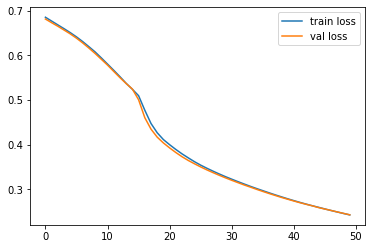

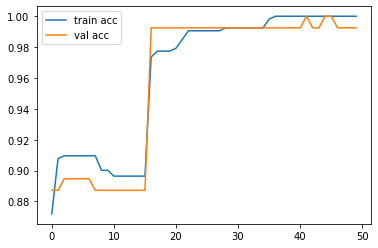

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

Accuracy: 0.9924812316894531


In [ ]:
model.save('C:/code/park_disease/Model/ANN.h5')

In [ ]:
y=model.predict(X_test)
y

5/5 [==============================] - 0s 1ms/step


array([[7.0275551e-01],
       [7.0275551e-01],
       [1.6132748e-03],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [1.6132748e-03],
       [1.6132748e-03],
       [7.1567176e-03],
       [5.8382256e-03],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [3.3489922e-03],
       [7.0275551e-01],
       [1.6132748e-03],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [1.6132748e-03],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [5.8382256e-03],
       [1.6132748e-03],
       [7.1567176e-03],
       [7.1567176e-03],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.0275551e-01],
       [7.1567176e-03],
       [7.1567176e-03],
       [7.0275551e-01],
       [1.6132748e-03],
       [1.6132748e-03],
       [1.613274

In [ ]:
X_train

,ENRLPD,ENRLPROD,ENRLLRRK2,ENRLGBA,ENRLSNCA,ENRLPRKN,ENRLPINK1,CONPD,CONPROD,CONLRRK2,CONGBA,CONSNCA,CONPRKN,CONPINK1
18,1,0,0,0,0,0,0,1,0,0,0,0,0,0
733,1,0,1,0,0,0,0,1,0,1,0,0,0,0
788,1,0,1,0,0,0,0,1,0,1,0,0,0,0
637,1,0,0,0,0,0,0,1,0,0,0,0,0,0
61,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,0,0,1,0,1,0,0,0,0
106,1,0,0,0,0,0,0,1,0,0,0,0,0,0
302,1,0,0,0,0,0,0,1,0,0,0,0,0,0
605,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
import pickle


In [ ]:
# Assuming you have already trained and fit your model
model.fit(X_train, y_train)


17/17 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 1.0000


In [ ]:
test=model.predict([[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

1/1 [==============================] - 0s 59ms/step


In [ ]:
test.argmax()

0